__Import Packages__

In [1]:
#pip install wordcloud

In [2]:
import requests
import nltk
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

__Get text data from blogpost__

In [3]:
url = "https://talesoftravels2405.wordpress.com/2018/04/08/hampi-the-forgotten-kingdom/"

In [4]:
response = requests.get(url)

In [5]:
if response.status_code == 200:
    content = response.text
else:
    print("Error:", response.status_code)

__Remove HTML tags from the text__

In [6]:
parsed_text = BeautifulSoup(content, "html.parser").get_text()
#parsed_text

__PREPROCESSING__

__1. Tokenize__

In [7]:
text_token = wt(parsed_text)
len(text_token)

1280

__2. Lower Casing__

In [8]:
lowercase_text = [token.lower() for token in text_token]
len(lowercase_text)

1280

__3. Stopword Removal__

In [9]:
stopWords = set(sw.words('english'))
filtered_text = [token for token in lowercase_text if token not in stopWords]
len(filtered_text)

779

__4. Cleaning and Normalization__

__a. Remove punctuation__

In [10]:
nopunct_text = [re.sub(r'[^\w\s]', ' ', token) for token in filtered_text]
len(nopunct_text)

779

__b. Remove Spaces__

In [11]:
nospace_text = [token for token in nopunct_text if token.strip() != '']
len(nospace_text)

623

__c. Remove Numbers__

In [12]:
nonum_text = [token for token in nospace_text if not re.match(r'^\d+$', token)]
len(nonum_text)

602

__WORD CLOUD__

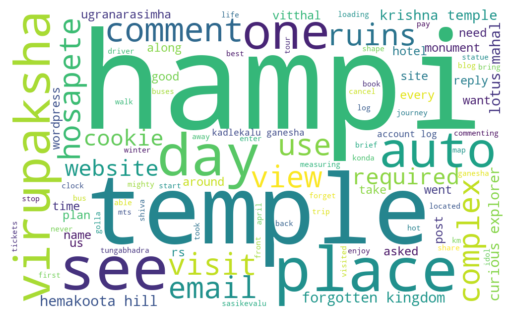

In [18]:
text = ' '.join(nonum_text)
wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()